# MELANOMA TUMOR SIZE PREDICTION

**Subject :** MACHINE LEARNING

**EXPLORATORY DATA ANALYSIS**

*   To find insights
*   To know about the dataset



#### WORKFLOW OF THE PROJECT :

1. Univariate analysis


      *   Central tendency
      *   Dispersion
2. Bivariate analysis

      *   Numerical plots
      *   Categorical plots
3. Prediction using Machine Learning Concepts

*   List item
*   List item






#### IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### DATASET LOADING

In [ ]:
df = pd.read_excel("Tumor_size_Prediction_1.xlsx")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.dtypes

DATA PREPROCESSING

In [ ]:
#no null values - data cleaning
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

#### GETTING UNIQUE VALUES:

In [ ]:
for i in df.columns:
  print(f"Unique {i} 's count : {df[i].nunique()}")
  print(f"{df[i].unique()}\n")

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize = [12, 8])
sns.heatmap(df.corr(),annot = True, cmap = 'viridis_r', fmt = '.2f');

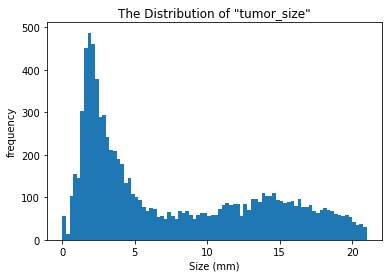

In [ ]:
bins = np.arange(0,df.tumor_size.max()+0.25, 0.25)
plt.hist(data = df, x = 'tumor_size', bins = bins)
plt.xlabel('Size (mm)')
plt.ylabel('frequency')
plt.title('The Distribution of "tumor_size"');

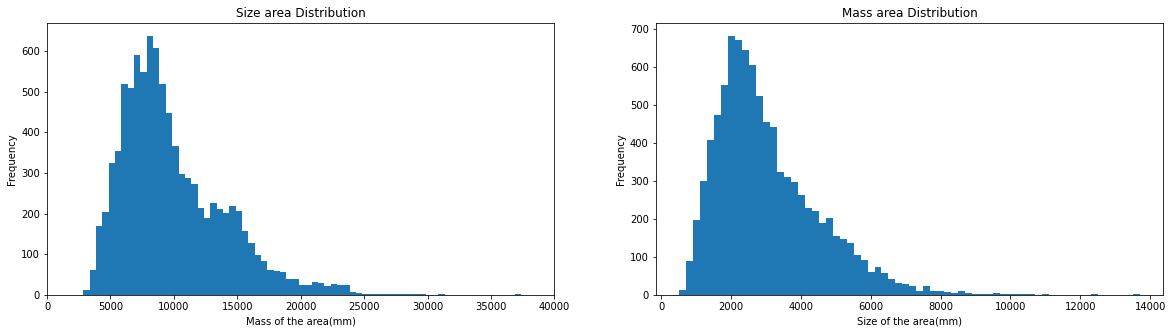

In [ ]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) 
bins = np.arange(2865, df.mass_npea.max()+500, 500)
plt.hist(data = df, x = 'mass_npea', bins = bins)
plt.xlabel('Mass of the area(mm)')
plt.ylabel('Frequency')
plt.xlim(0, 40000)
plt.title('Size area Distribution')

plt.subplot(1, 2, 2) 
bins = np.arange(510, df.size_npear.max()+200, 200)
plt.hist(data = df, x = 'size_npear', bins = bins)
plt.xlabel('Size of the area(mm)')
plt.ylabel('Frequency')
# plt.xlim(0, 40000);
plt.title('Mass area Distribution');

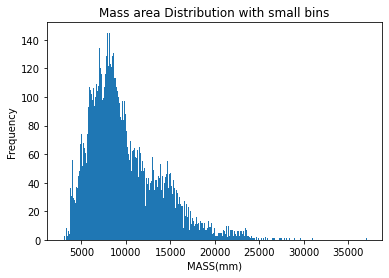

In [ ]:
bins = np.arange(2865, df.mass_npea.max()+100, 100)
plt.hist(data = df, x = 'mass_npea', bins = bins)
plt.xlabel('MASS(mm)')
plt.ylabel('Frequency')
plt.title('Mass area Distribution with small bins');

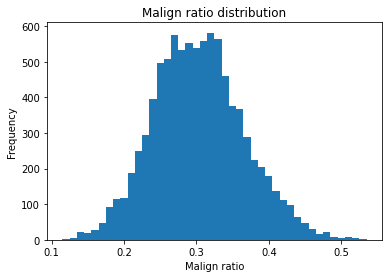

In [ ]:
#higher ratio we get the less spread of Tumor.
bins = np.arange(df.malign_ratio.min(), df.malign_ratio.max()+0.01, 0.01)
plt.hist(data = df, x = 'malign_ratio', bins = bins)
plt.xlabel('Malign ratio')
plt.ylabel('Frequency')
plt.title('Malign ratio distribution');

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['tumor_size']
X = df.drop(['tumor_size'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.svm import LinearSVR

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
from sklearn.tree import ExtraTreeRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
from sklearn.ensemble import VotingRegressor

**Linear Regression**

In [ ]:
#understanding the relationship between input and output numerical variables
#minimize the residual sum of squares between the observed targets

lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([11.23432325,  8.89382245, 12.70598903, ...,  6.50657065,
        9.8266435 ,  7.21130517])

In [ ]:
mae_lr = mean_absolute_error(y_test,y_pred_lr)
mae_lr

4.308725498807351

**Decision Tree**

In [ ]:
dt_model = DecisionTreeRegressor(max_leaf_nodes=100,random_state=1)

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

In [ ]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([11.32883333, 12.15236424, 16.152125  , ...,  4.31676124,
       12.68749296, 10.5620597 ])

In [ ]:
mae_dt = mean_absolute_error(y_test,y_pred_dt)
mae_dt

3.6423019759297532

**Random forest**

In [ ]:
rf_model = RandomForestRegressor(random_state=0)

In [ ]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [ ]:
mae_rf = mean_absolute_error(y_test,y_pred_rf)
mae_rf

2.9775102142544823

**XG Boost**

In [ ]:
xg_model = XGBRegressor(n_estimators=500,
                        learning_rate=0.05,
                        random_state = 1)

In [ ]:
xg_model.fit(X_train,y_train,
             early_stopping_rounds=5,
             eval_set=[(X_test,y_test)],
             verbose=False)

[16:43:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, n_estimators=500, random_state=1)

In [ ]:
y_pred_xg = xg_model.predict(X_test)
y_pred_xg

array([10.396    , 10.051304 , 14.734467 , ...,  5.4989076, 11.251607 ,
        9.210086 ], dtype=float32)

In [ ]:
mae_xg = mean_absolute_error(y_test,y_pred_xg)
mae_xg

3.588241481094002

**Gradient boosting**

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=150,random_state=0)

In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=150, random_state=0)

In [ ]:
y_pred_gb = gb_model.predict(X_test)
y_pred_gb

array([10.78800808, 10.08213267, 14.88716089, ...,  5.78710458,
       11.20871049,  8.77498747])

In [ ]:
mae_gb = mean_absolute_error(y_test,y_pred_gb)
mae_gb

3.6936544473419564

**RidgeCV**

In [ ]:
ridge_model = RidgeCV(cv=5)

In [ ]:
ridge_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [ ]:
y_pred_ridge = ridge_model.predict(X_test)
y_pred_ridge

array([11.22972113,  8.89577207, 12.69615636, ...,  6.50530332,
        9.82303226,  7.21473487])

In [ ]:
mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
mae_ridge

4.310096695557291

**Support Vector Machine**

In [ ]:
svr_model = SVR(kernel='rbf')

In [ ]:
svr_model.fit(X_train,y_train)

SVR()

In [ ]:
y_pred_svr = svr_model.predict(X_test)
y_pred_svr

array([4.46593842, 5.90350416, 5.24473451, ..., 5.28987931, 5.2452693 ,
       6.23429966])

In [ ]:
mae_svr = mean_absolute_error(y_test,y_pred_svr)
mae_svr

5.188331875261993

In [ ]:
#svr_model_n = SVR(kernel='linear',C=1)

In [ ]:
#svr_model_n.fit(X_train_n,y_train_n)

In [ ]:
#y_pred_svr_n = svr_model_n.predict(X_test_n)
#y_pred_svr_n

In [ ]:
#mae_svr_n = mean_absolute_error(y_test_n,y_pred_svr_n)
#mae_svr_n

In [ ]:
#scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
#scores.mean()

**Linear Support Vector Regression**

In [ ]:
lsvr_model = LinearSVR(random_state=1)

In [ ]:
lsvr_model.fit(X_train,y_train)

LinearSVR(random_state=1)

In [ ]:
y_pred_lsvr = lsvr_model.predict(X_test)
y_pred_lsvr

array([13.8034533 ,  9.15772254, 15.38724997, ..., 12.01152121,
       12.86071843,  9.19497852])

In [ ]:
mae_lsvr = mean_absolute_error(y_test,y_pred_lsvr)
mae_lsvr

7.445246551089847

**MLPRegressor**

In [ ]:
MLP_model = MLPRegressor(random_state=1)

In [ ]:
param_grid = {'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.01],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}

In [ ]:
mlp_gs = GridSearchCV(MLP_model,param_grid = param_grid,cv=10, verbose=True, pre_dispatch='2*n_jobs')

In [ ]:
mlp_gs.fit(X_train,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=MLPRegressor(random_state=1),
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                12, 13, 14, 15, 16, 17, 18,
                                                19],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.01], 'max_iter': [1000],
                         'power_t': [0.5], 'solver': ['adam'],
                         'warm_start': [False]},
             verbose=True)

In [ ]:
y_pred_mlp = mlp_gs.predict(X_test)
y_pred_mlp

array([7.59812327, 5.59332926, 6.47047104, ..., 6.43259158, 6.48971242,
       5.03117843])

In [ ]:
mae_mlp = mean_absolute_error(y_test,y_pred_mlp)
mae_mlp

5.921096253487148

**Stochastic gradient descent regressor**

In [ ]:
#max_iter=1000, tol=1e-3
sgd_model = SGDRegressor(random_state=0)

In [ ]:
sgd_model.fit(X_train, y_train)

SGDRegressor(random_state=0)

In [ ]:
y_pred_sgd = sgd_model.predict(X_test)
y_pred_sgd

array([-2.32470238e+20, -1.69085605e+20, -1.97669316e+20, ...,
       -1.95820035e+20, -1.97525419e+20, -1.51489796e+20])

In [ ]:
mae_sgd = mean_absolute_error(y_test,y_pred_sgd)
mae_sgd

2.1239026294124174e+20

**Bagging Regressor**

In [ ]:
bag_model = BaggingRegressor(random_state=0)

In [ ]:
bag_model.fit(X_train,y_train)

BaggingRegressor(random_state=0)

In [ ]:
y_pred_bag = bag_model.predict(X_test)
y_pred_bag

array([ 9.8927, 15.3804, 17.0033, ...,  2.8336, 14.1999,  9.2664])

In [ ]:
mae_bag = mean_absolute_error(y_test,y_pred_bag)
mae_bag

3.105567380848273

**Extra Trees Regressor**

In [ ]:
et_model = ExtraTreeRegressor(random_state=0)

In [ ]:
et_model.fit(X_train,y_train)

ExtraTreeRegressor(random_state=0)

In [ ]:
y_pred_et = et_model.predict(X_test)
y_pred_et

array([ 4.543,  7.895, 17.802, ...,  3.707,  3.805, 10.362])

In [ ]:
mae_et = mean_absolute_error(y_test,y_pred_et)
mae_et

3.9240087450808923

**AdaBoost Regressor**

In [ ]:
ada_model = AdaBoostRegressor(random_state=0, n_estimators=100)

In [ ]:
ada_model.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [ ]:
y_pred_ada = ada_model.predict(X_test)
y_pred_ada

array([ 9.93482629,  9.03319015, 11.74950921, ...,  8.74497168,
       10.41519992,  9.00280354])

In [ ]:
mae_ada = mean_absolute_error(y_test,y_pred_ada)
mae_ada

5.108503193323199

**Voting Regressor**

In [ ]:
vr_model = VotingRegressor([('lr', lr_model), ('rf', rf_model)])

In [ ]:
vr_model.fit(X_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(random_state=0))])

In [ ]:
y_pred_vr = vr_model.predict(X_test)
y_pred_vr

array([10.83459162, 10.92766622, 14.50187452, ...,  5.21980532,
       10.69660175,  7.25214259])

In [ ]:
mae_vr = mean_absolute_error(y_test,y_pred_vr)
mae_vr

3.54210049126165

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree Regressor', 'Random Forest','XG Boost', 'GradientBoostingRegressor',
              'RidgeCV', 'Support Vector Machine', 'Linear Support Vector Machine',
              'MLPRegressor', 'BaggingRegressor',
              'ExtraTreesRegressor', 'AdaBoostRegressor', 'VotingRegressor'],
    
    'Mean absolute error' : [mae_lr, mae_dt, mae_rf, mae_xg, mae_gb, mae_ridge,
                             mae_svr, mae_lsvr, mae_mlp, mae_bag, mae_et,
                             mae_ada, mae_vr]
                     })

In [ ]:
models['Mean absolute error'] = round(models['Mean absolute error'])

In [ ]:
print('Prediction accuracy for models by Mean Absolute Error')
models.sort_values(by=['Mean absolute error'], ascending = False)

Prediction accuracy for models by Mean Absolute Error


,Model,Mean absolute error
7,Linear Support Vector Machine,7.0
8,MLPRegressor,6.0
6,Support Vector Machine,5.0
11,AdaBoostRegressor,5.0
0,Linear Regression,4.0
1,Decision Tree Regressor,4.0
3,XG Boost,4.0
4,GradientBoostingRegressor,4.0
5,RidgeCV,4.0
10,ExtraTreesRegressor,4.0


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred_rf)

0.5498010994614709

In [ ]:
r2_score(y_test, y_pred_bag)

0.49203845180274297

In [ ]:
#Since R^2 value is high for Random forest, the values are predicted using it

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([10.43486, 12.96151, 16.29776, ...,  3.93304, 11.56656,  7.29298])